In [2]:
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import pickle

### Correlation based

(13, 5887)
18185750 1.0


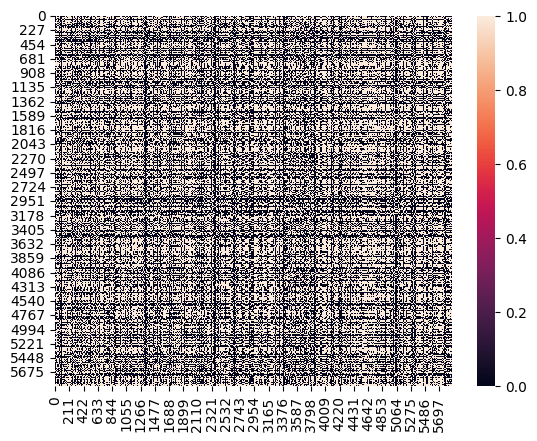

In [3]:
df = pd.read_csv("./huvec/cd_matrix_dA.csv")
X = df.values
print(X.shape)
skeleton = itertools.product(range(X.shape[1]), range(X.shape[1]-1)) 

# Correlation matrix with Permutation testing
#fig, (data_ax, corr_ax) = plt.subplots(2)
df_gene_expression = df.drop(columns=["radiation"])
df_gene_expression = df #.iloc[0:7] # remove the perturbed samples

num_genes = len(df_gene_expression.columns)
df_gene_expression = StandardScaler().fit_transform(df_gene_expression)
df_gene_expression = pd.DataFrame(data=df_gene_expression)
#sns.heatmap(df_gene_expression, ax=data_ax)
corr_mat = df_gene_expression.corr('pearson', numeric_only=True).to_numpy()
beta = 6
adjacency = np.abs(corr_mat)
np.fill_diagonal(adjacency, 0)
print(np.sum(adjacency>0.5), np.max(np.abs(corr_mat)))

sns.heatmap(adjacency>0.5)
plt.show()

(array([2973891., 3046516., 3207944., 3442702., 3753844., 4108702.,
        4387852., 4453596., 3831170., 1450552.]),
 array([0.        , 0.09976592, 0.19953183, 0.29929775, 0.39906367,
        0.49882958, 0.5985955 , 0.69836141, 0.79812733, 0.89789325,
        0.99765916]),
 <BarContainer object of 10 artists>)

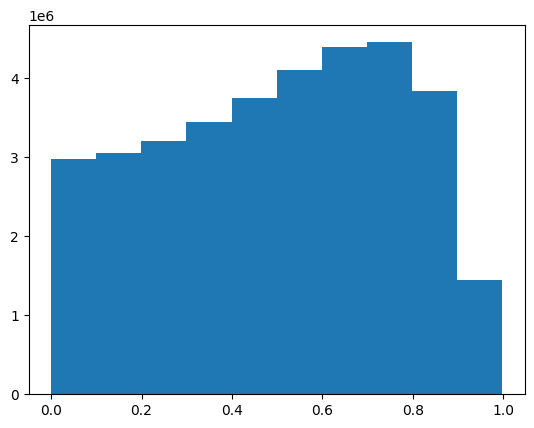

In [4]:
plt.hist(adjacency.flatten())

In [5]:
random_corr_coef = []
for i in range(100):
    shuffled_array = df_gene_expression.values
    [np.random.shuffle(x) for x in shuffled_array.T]
    shuffled_final_data_set = pd.DataFrame(data=shuffled_array)
    shuffle_corr_mat = shuffled_final_data_set.corr('pearson', numeric_only=True).to_numpy()
    np.fill_diagonal(shuffle_corr_mat, 0)
    assert(np.max(np.abs(shuffle_corr_mat)) < np.max(np.abs(corr_mat)))
    random_corr_coef.append(np.max(np.abs(shuffle_corr_mat)))
print(random_corr_coef)
ci_interval = st.t.interval(0.9, len(random_corr_coef)-1, 
                            loc=np.mean(random_corr_coef), 
                            scale=st.sem(random_corr_coef))
print(ci_interval)
cutoff = ci_interval[1]
print(cutoff)
adjacency[np.abs(adjacency)<=cutoff] = 0
adjacency[np.abs(adjacency)>cutoff] = 1
print(f"Superstructure contains {np.sum(adjacency)} edges which is \
        {np.sum(adjacency)/(adjacency.shape[1]**2)} fraction of all possible edges")


[0.9847693986200536, 0.9841404015372283, 0.9934626013908994, 0.9887953162724941, 0.9892776913174613, 0.9881909997192877, 0.9878717591231279, 0.9846742685521885, 0.990873392319709, 0.9868345445341229, 0.9832622748233045, 0.9892868376301469, 0.9834504112225988, 0.9851693191564224, 0.9914950513130629, 0.9861313223131104, 0.9854943071540769, 0.9900188629410723, 0.9927522849756408, 0.9888103866694615, 0.9873484596463113, 0.9874320890339552, 0.9921802473707303, 0.9959133155450401, 0.9860721287516363, 0.9893788786165787, 0.9942437105001205, 0.9852414382206357, 0.9856041465548409, 0.9829778446869988, 0.9892905495482368, 0.9879711422739429, 0.9915503562003132, 0.9862376780176848, 0.9872881615571105, 0.9883357632760705, 0.9868597499159815, 0.9823301312410497, 0.9879787420612295, 0.9928291255232787, 0.9824926284035811, 0.987501957259368, 0.984211716620574, 0.9925572390747301, 0.9927309193125166, 0.9920841799866996, 0.9857130111979034, 0.9912861513732251, 0.9883907549728603, 0.9799285490510845, 0.

In [6]:
skeleton = [(i,j) for (i,j) in itertools.product(range(num_genes), range(num_genes)) if corr_mat[i,j] ==1]
genes = set()
for (i,j) in skeleton:
   print(df.columns[i])
   print(df.columns[j]) 
   
   genes.add(df.columns[i])
   genes.add(df.columns[j])
#print(len(genes), genes)

RPL23AP53
RPL23AP53
HSPH1
HSPH1
DBT
DBT
CCNA1
CCNA1
STAMBPL1
STAMBPL1
LBH
LBH
CLEC11A
CLEC11A
HNRNPA3
HNRNPA3
SULF1
SULF1
CASP1
CASP1
B4GALT1
B4GALT1
SRM
SRM
TGFB1
TGFB1
LRRC20
LRRC20
POLL
POLL
MAGED1
MAGED1
ERCC6L
ERCC6L
CNOT9
CNOT9
MGME1
MGME1
PDLIM1
PDLIM1
AGPS
AGPS
P3H4
P3H4
BTG1
BTG1
R3HCC1
R3HCC1
SNX7
SNX7
PUS3
PUS3
TNFRSF21
TNFRSF21
FN3KRP
FN3KRP
DOCK4
DOCK4
PGF
PGF
PIK3C2A
PIK3C2A
FLI1
FLI1
MMP16
MMP16
RIC8A
RIC8A
RPS14
RPS14
LMBRD1
LMBRD1
C2CD5
C2CD5
RFC2
RFC2
HPRT1
HPRT1
PAK4
PAK4
DYNC2I2
DYNC2I2
MAN1A1
MAN1A1
SRSF2
SRSF2
ZSWIM3
ZSWIM3
GOLPH3
GOLPH3
PRXL2C
PRXL2C
MPDZ
MPDZ
ORC6
ORC6
ALG3
ALG3
CHAF1A
CHAF1A
TRAM2
TRAM2
PPP2R2A
PPP2R2A
LRRC17
LRRC17
CREB3L1
CREB3L1
NUP37
NUP37
FLNB
FLNB
SORBS2
SORBS2
ZCCHC17
ZCCHC17
PCTP
PCTP
PARP10
PARP10
NOP53
NOP53
NGLY1
NGLY1
TMF1
TMF1
MYH10
MYH10
LRRC32
LRRC32
ARHGEF18
ARHGEF18
PIMREG
PIMREG
CCIN
CCIN
ADARB1
ADARB1
KIF3A
KIF3A
MPP2
MPP2
RELB
RELB
HLX
HLX
CRELD2
CRELD2
PHACTR4
PHACTR4
ISOC1
ISOC1
CDK19
CDK19
PRPS1
PRPS1
SEC24D
SEC24D
MMP24O

### Prior knowledge

In [ ]:
# df_A = pd.read_csv("./huvec/cd_matrix_dA.csv")
# df_B = pd.read_csv("./huvec/cd_matrix_dB.csv")
# df_C = pd.read_csv("./huvec/cd_matrix_dC.csv")
# df_D = pd.read_csv("./huvec/cd_matrix_dD.csv")
# df_E = pd.read_csv("./huvec/cd_matrix_dE.csv")

# df_A = pd.read_csv("./rpe1/cd_tpm_matrix_dA.csv")
# df_B = pd.read_csv("./rpe1/cd_tpm_matrix_dB.csv")
# df_C = pd.read_csv("./rpe1/cd_tpm_matrix_dC.csv")
# df_D = pd.read_csv("./rpe1/cd_tpm_matrix_dD.csv")
# df_E = pd.read_csv("./rpe1/cd_tpm_matrix_dE.csv")

df_A = pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_dF.csv")
df_B = pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_dG.csv")
df_C = pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_dH.csv")
df_D = pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_dI.csv")
df_E = pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_dJ.csv")
print(df_A.shape, df_B.shape, df_C.shape, df_D.shape, df_E.shape)
overlapping_genes = set(df_A.columns.values)
all_genes = set(df_A.columns.values)
print(len(overlapping_genes), len(all_genes))
for data in [df_B, df_C, df_D, df_E]:
    overlapping_genes = overlapping_genes.intersection(data.columns.values)
    all_genes = all_genes.union(data.columns.values)
    print(len(overlapping_genes), len(all_genes))

In [18]:
df_combined =  pd.read_csv("./rpe1_experiment2/cd_tpm_matrix_combined_dose_rate.csv")
print(df_combined.shape)
all_genes = df_combined.columns.values

(108, 11898)


In [5]:
# import requests

# # Load STRING alias file
# alias_file = "./prior_knowledge/protein.info.v11.5.txt"
# alias_df = pd.read_csv(alias_file, sep="\t")

# # Create ENSG → Gene name dictionary
# ensp_to_gene = dict(zip(alias_df["#string_protein_id"], alias_df["preferred_name"]))

# # Load the PPI edge list
# ppi_file = "./prior_knowledge/9606.protein.physical.links.v11.5.txt"
# ppi_df = pd.read_csv(ppi_file, sep=" ")

# # Convert ENSG IDs to Gene Names
# ppi_df["protein1"] = ppi_df["protein1"].map(ensp_to_gene)
# ppi_df["protein2"] = ppi_df["protein2"].map(ensp_to_gene)

# # Find ENSG IDs that need fixing
# ensg_ids = set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))
# ensg_ids = {x for x in ensg_ids if x.startswith("ENSG")}
# print(len(ensg_ids))

# # Function to convert ENSG → Gene Name using Ensembl API
# def ensg_to_gene(ensg_ids):
#     url = "https://rest.ensembl.org/lookup/id"
#     headers = {"Content-Type": "application/json"}
#     response = requests.post(url, headers=headers, json={"ids": list(ensg_ids)})
#     num_found = 0
#     if response.ok:
#         data = response.json()
#         ensg_to_gene_map = {}
#         for ensg in data:
#             if data[ensg] is not None:
#                 if data[ensg].get('display_name') is not None:
#                     ensg_to_gene_map[ensg] = data[ensg].get('display_name')
#                     num_found+=1
#         print(num_found)
#         return ensg_to_gene_map
#     else:
#         print("Error retrieving gene names:", response.text)
#         return {}

# # Convert ENSG → Gene Name
# ensg_to_gene_map = ensg_to_gene(ensg_ids)
# # Replace ENSG IDs with gene names
# ppi_df["protein1"] = ppi_df["protein1"].replace(ensg_to_gene_map)
# ppi_df["protein2"] = ppi_df["protein2"].replace(ensg_to_gene_map)

# # Drop links where we could not identify the gene name
# ensg_ids = set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))
# ensg_ids = {x for x in ensg_ids if x.startswith("ENSG")}
# ppi_df = ppi_df.query("(protein1 not in @ensg_ids) and (protein2 not in @ensg_ids)")

# Save the final file with gene names
ppi_df = pd.read_csv("./prior_knowledge/string_ppi_gene_names.csv", header=0)


In [5]:
print(ppi_df)

        protein1 protein2  combined_score
0           ARF5     GPN1             156
1           ARF5    RPS17             177
2           ARF5     NET1             162
3           ARF5     BBS1             379
4           ARF5  LDHAL6B             287
...          ...      ...             ...
1963031    EIF3L   RPS27A             928
1963032    EIF3L    RPS11             925
1963033    EIF3L   EIF3CL             988
1963034    EIF3L     TOX3             152
1963035    EIF3L     TP53             270

[1963036 rows x 3 columns]


In [6]:
htf_file = "./prior_knowledge/tf-target-infomation.txt"
htf_df = pd.read_csv(htf_file, sep="\t")
print(htf_df)

              TF        target   tissue
0          AEBP2        TMEM53    colon
1          AEBP2      C1orf228    colon
2          AEBP2        FBXO31    colon
3          AEBP2      ADAMTSL5    colon
4          AEBP2   CTB-25B13.9    colon
...          ...           ...      ...
1342124  CCDC101          CLN3  unclear
1342125  CCDC101  RP11-666O2.1  unclear
1342126  CCDC101  RP11-666O2.2  unclear
1342127  CCDC101  RP11-666O2.4  unclear
1342128  CCDC101  RP11-666O2.5  unclear

[1342129 rows x 3 columns]


In [7]:
trrust_file = "./prior_knowledge/trrust.tsv"
trrust_df = pd.read_csv(trrust_file, sep="\t", header=None)
print(trrust_df)

          0       1           2                  3
0      AATF     BAX  Repression           22909821
1      AATF  CDKN1A     Unknown           17157788
2      AATF    KLK3     Unknown           23146908
3      AATF     MYC  Activation           20549547
4      AATF    TP53     Unknown           17157788
...     ...     ...         ...                ...
9391  ZNF76  CDKN1A  Repression           15280358
9392  ZNF76  PCYT1A  Activation           14702349
9393  ZNF76  TALDO1     Unknown           14702349
9394  ZNRD1   ABCB1  Activation           16373708
9395  ZNRD1    BCL2  Activation  16373708;16609701

[9396 rows x 4 columns]


In [8]:
string_undirected_edges = {(start, end) for start, end in zip(ppi_df["protein1"], ppi_df["protein2"])}
htf_edges = {edge for edge in zip(htf_df['TF'], htf_df['target'])}
trrust_edges = {edge for edge in zip(trrust_df[0], trrust_df[1])}
print(f"STRING contains {len(string_undirected_edges)} undirected edges, \
      HTF contains {len(htf_edges)} directed edges, \
      TRRUST contains {len(trrust_edges)} directed edges")
overlapping_edges = htf_edges.intersection(string_undirected_edges)
print(f"STRING and HTF overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(string_undirected_edges), len(htf_edges)))} %")

STRING contains 1959329 undirected edges,       HTF contains 1319123 directed edges,       TRRUST contains 8427 directed edges
STRING and HTF overlap over 16426 edges,     0.838348230440115 %


In [9]:
proteins = {p for p in set(ppi_df["protein1"]).union(set(ppi_df["protein2"]))}
htf_tf = {tf for tf in htf_df['TF']}
trrust_tf = {tf for tf in trrust_df[0]}
print(f"STRING contains interactions over {len(proteins)} proteins, \
      HTF has interactions over {len(htf_tf)} TFs, \
      TRRUST has interactions over {len(trrust_tf)} TFs")
overlapping_tf = proteins.intersection(htf_tf)
print(f"STRING and HTF overlap over {len(overlapping_tf)} TF/proteins, \
    {100*len(overlapping_tf)/ len(htf_tf)} %")

STRING contains interactions over 18207 proteins,       HTF has interactions over 495 TFs,       TRRUST has interactions over 795 TFs
STRING and HTF overlap over 492 TF/proteins,     99.39393939393939 %


In [11]:
hubs = ["TP53", "MYC", "FOS"]
for h in hubs:
    print(f"{h} in TFs {h in overlapping_tf}")
    print(f"{h} in genes {h in all_genes}")

TP53 in TFs True
TP53 in genes True
MYC in TFs True
MYC in genes True
FOS in TFs True
FOS in genes True


In [10]:
radbio_file = "./prior_knowledge/radiation_edges.txt"
radbio_df = pd.read_csv(radbio_file)
print(radbio_df.head())

   node1    node2                                          citation
0  DNAPK     TP53  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
1   TP53   CDKN1A  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
2   TP53  GADD45A  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
3   TP53      p21  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710
4   MDM2     MDM2  https://pmc.ncbi.nlm.nih.gov/articles/PMC9319710


In [11]:
radbio_edges = {edge for edge in zip(radbio_df['node1'], radbio_df['node2'])}
print(f"Curated radiation database contains {len(radbio_edges)} directed edges")
overlapping_edges = radbio_edges.intersection(string_undirected_edges)
print(f"STRING and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(string_undirected_edges), len(radbio_edges)))} %")
overlapping_edges = radbio_edges.intersection(htf_edges)
print(f"HTF and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(htf_edges), len(radbio_edges)))} %")
overlapping_edges = radbio_edges.intersection(trrust_edges)
print(f"TRRUST and Radbio overlap over {len(overlapping_edges)} edges, \
    {100* len(overlapping_edges)/max((len(trrust_edges), len(radbio_edges)))} %")

Curated radiation database contains 35 directed edges
STRING and Radbio overlap over 8 edges,     0.0004083030466042201 %
HTF and Radbio overlap over 3 edges,     0.00022742382628458452 %
TRRUST and Radbio overlap over 5 edges,     0.05933309600094933 %


### Key Genes

In [12]:
important_genes = pd.read_csv("./prior_knowledge/radiation_genes.txt", sep=' ', header=None)
important_genes = important_genes.iloc[:,0]
print(important_genes.shape)

(56,)


In [19]:
# How many of the identified genes are in our data set
important_genes_in_dataset = [g for g in important_genes if g in all_genes]
print(f"{len(important_genes_in_dataset)} out of {len(important_genes)} of important genes are DE genes in dataset")
# Find the sub-networks for STRING, TRRUST and htfTarget over this gene set
string_important_edges = []
trrust_important_edges = []
htf_important_edges = []
for g in important_genes_in_dataset:
    s = [edge for edge in string_undirected_edges if (g == edge[0]) or (g == edge[1])]
    t = [edge for edge in trrust_edges if (g == edge[0]) or (g == edge[1])]
    h = [edge for edge in htf_edges if (g == edge[0]) or (g == edge[1])]
    s = [keep for keep in s if (keep[0] in all_genes) and keep[1] in all_genes]
    t = [keep for keep in t if (keep[0] in all_genes) and keep[1] in all_genes]
    h = [keep for keep in h if (keep[0] in all_genes) and keep[1] in all_genes]

    string_important_edges += s
    trrust_important_edges += t
    htf_important_edges += h
string_important_edges = set(string_important_edges)
trrust_important_edges = set(trrust_important_edges)
htf_important_edges = set(htf_important_edges)
print(f"STRING subnetwork over important genes has {len(string_important_edges)} edges")
print(f"TRRUST subnetwork over important genes has {len(trrust_important_edges)} edges")
print(f"HTF subnetwork over important genes has {len(htf_important_edges)} edges")


43 out of 56 of important genes are DE genes in dataset
STRING subnetwork over important genes has 13382 edges
TRRUST subnetwork over important genes has 1021 edges
HTF subnetwork over important genes has 28426 edges


In [20]:
import networkx as nx

string_sub_net = nx.Graph()
string_sub_net.add_edges_from(string_important_edges)
print(len(string_sub_net.nodes))

trrust_sub_net = nx.DiGraph()
trrust_sub_net.add_edges_from(trrust_important_edges)
print(len(trrust_sub_net.nodes))

htf_sub_net = nx.DiGraph()
htf_sub_net.add_edges_from(htf_important_edges)
print(len(htf_sub_net.nodes))


3212
562
9392


In [21]:
def get_subnetwork(important_genes, de_genes):
    # How many of the identified genes are in our data set
    important_genes_in_dataset = [g for g in important_genes if g in de_genes]
    # Find the sub-networks for STRING, TRRUST and htfTarget over this gene set
    string_important_edges = []
    trrust_important_edges = []
    htf_important_edges = []
    for g in important_genes_in_dataset:
        s = [edge for edge in string_undirected_edges if (g == edge[0]) or (g == edge[1])]
        t = [edge for edge in trrust_edges if (g == edge[0]) or (g == edge[1])]
        h = [edge for edge in htf_edges if (g == edge[0]) or (g == edge[1])]
        s = [keep for keep in s if (keep[0] in de_genes) and keep[1] in de_genes]
        t = [keep for keep in t if (keep[0] in de_genes) and keep[1] in de_genes]
        h = [keep for keep in h if (keep[0] in de_genes) and keep[1] in de_genes]

        string_important_edges += s
        trrust_important_edges += t
        htf_important_edges += h
    string_important_edges = set(string_important_edges)
    trrust_important_edges = set(trrust_important_edges)
    htf_important_edges = set(htf_important_edges)
    subnet = nx.DiGraph()
    subnet.add_edges_from(string_important_edges)
    subnet.add_edges_from(trrust_important_edges)
    subnet.add_edges_from(htf_important_edges)
    return subnet

In [15]:
import pickle
experiment_name = "rpe1_experiment2"
datasets = ['F', 'G', 'H', 'I', 'J']
top_n = 10 #len(important_genes)
for dose, data in zip(datasets, [df_A, df_B, df_C, df_D, df_E]):
    print(dose)
    G = get_subnetwork(important_genes[0:top_n], list(data.columns))
    #G = get_subnetwork(list(data.columns), list(data.columns))

    # print("GPR4" in G.nodes())
    TFs = [node for node in G.nodes if G.out_degree(node) > 50]
    print(TFs)
    handcraft_partition = {}
    for i in range(len(TFs)):
        print([(node,G.degree(node)) for node in G.neighbors(TFs[i])])
        subnet = get_subnetwork([TFs[i]], list(data.columns))
        if len(subnet.nodes)>0:
            print( TFs[i],TFs[i] in important_genes.values, len(subnet.nodes), len(subnet.edges))
            handcraft_partition[i] = list(subnet.nodes)
    print(len(handcraft_partition))
    causal_partition = dict()
    for idx, c in enumerate(list(handcraft_partition.values())):
        c_new = [node for node in c if node not in TFs] # remove TFs from subset so we don't get huge partitions. 
        tf_new = [node for node in c if node in TFs]
        outer_node_boundary = nx.node_boundary(G, c_new)
        expanded_cluster = set(c).union(outer_node_boundary).union(tf_new)
        causal_partition[idx] = list(expanded_cluster)
        print(len(outer_node_boundary), len(expanded_cluster))
    # print(causal_partition)
    with open(f"./{experiment_name}/cd_partition_d{dose}_new.pickle", "wb") as file:
        pickle.dump(causal_partition, file)
    causal_partition_by_node = {}
    for idx, c in causal_partition.items():
        for node in c:
            causal_partition_by_node[node] = idx
    nx.set_node_attributes(G, causal_partition_by_node, name='partition') 
    nx.write_gexf(G, f"./{experiment_name}/cd_subgraph_d{dose}.gexf")
    # # Min-max normalization for determining size 
    # degrees = np.array([G.degree(node) for node in G.nodes])
    # min_deg, max_deg = degrees.min(), degrees.max()
    # sizes = 10 + (degrees - min_deg) / (max_deg - min_deg) * (10 - 1)
    #create_partition_plot(G, G.nodes, causal_partition, f"./huvec/cd_subgraph_d{dose}.png", node_size=dict(zip(G.nodes, sizes)))
    
    


F


['TP53', 'E2F4', 'CDKN1A', 'MYC', 'FOS', 'BCL2', 'NFYB', 'EGR2', 'B2M']
[('NCOA2', 4), ('APPL1', 2), ('CLUAP1', 2), ('MUS81', 5), ('OLA1', 2), ('NAE1', 4), ('SIRT1', 8), ('MGST1', 4), ('UBE2I', 13), ('NUDT16L1', 2), ('FOS', 2831), ('NABP1', 2), ('KLF2', 3), ('NFYC', 8), ('RPS3', 2), ('BRD4', 15), ('TAF5', 3), ('SUV39H2', 4), ('SUPT16H', 4), ('USP42', 2), ('CTBP1', 6), ('SETD1B', 7), ('TRIM25', 3), ('PPP4C', 4), ('E2F1', 16), ('DDIT4', 5), ('WDR5', 12), ('PLAGL1', 2), ('HUWE1', 4), ('TCF4', 7), ('MAPK7', 7), ('NCOA6', 6), ('EP400', 9), ('PRKAA1', 3), ('BRCC3', 2), ('MED1', 6), ('SEC13', 4), ('ANXA2', 5), ('PRIMPOL', 2), ('PDIA3', 6), ('JUN', 14), ('PHB2', 6), ('TUBB3', 4), ('PIAS3', 2), ('ZNF385A', 4), ('ASPM', 2), ('DMC1', 2), ('SYVN1', 6), ('SIN3B', 8), ('PPP2R1A', 2), ('TAF1C', 2), ('ARRB1', 4), ('RANBP9', 3), ('RPS7', 5), ('CYP27C1', 2), ('AURKA', 10), ('CDC25C', 4), ('HDAC4', 7), ('RNF14', 4), ('SKP2', 8), ('CTCF', 12), ('PML', 12), ('RNF2', 7), ('KLF5', 12), ('RELA', 10), ('DNA2',

In [26]:
import pickle
experiment_name = "rpe1_experiment2"
top_n = 10
G = get_subnetwork(important_genes[0:top_n], list(df_combined.columns))
#G = get_subnetwork(list(data.columns), list(data.columns))

# print("GPR4" in G.nodes())
TFs = [node for node in G.nodes if G.out_degree(node) > 50]
print(TFs)
handcraft_partition = {}
for i in range(len(TFs)):
    print([(node,G.degree(node)) for node in G.neighbors(TFs[i])])
    subnet = get_subnetwork([TFs[i]], list(df_combined.columns))
    if len(subnet.nodes)>0:
        print( TFs[i],TFs[i] in important_genes.values, len(subnet.nodes), len(subnet.edges))
        handcraft_partition[i] = list(subnet.nodes)
print(len(handcraft_partition))
causal_partition = dict()
for idx, c in enumerate(list(handcraft_partition.values())):
    c_new = [node for node in c if node not in TFs] # remove TFs from subset so we don't get huge partitions. 
    tf_new = [node for node in c if node in TFs]
    outer_node_boundary = nx.node_boundary(G, c_new)
    expanded_cluster = set(c).union(outer_node_boundary).union(tf_new)
    causal_partition[idx] = list(expanded_cluster)
    print(len(outer_node_boundary), len(expanded_cluster))
# print(causal_partition)
with open(f"./{experiment_name}/cd_partition_combined.pickle", "wb") as file:
    pickle.dump(causal_partition, file)
causal_partition_by_node = {}
for idx, c in causal_partition.items():
    for node in c:
        causal_partition_by_node[node] = idx
nx.set_node_attributes(G, causal_partition_by_node, name='partition') 
nx.write_gexf(G, f"./{experiment_name}/cd_subgraph_combined.gexf")

['NFYB', 'BCL2', 'TP53', 'CDKN1A', 'MYC', 'E2F4', 'B2M', 'FOS', 'EGR2']
[('EZH2', 12), ('BRD8', 8), ('KDM2B', 6), ('KIF2A', 2), ('CHD2', 3), ('SHPRH', 2), ('RBBP7', 4), ('ARID4B', 2), ('LAGE3', 2), ('TBRG1', 5), ('SREBF1', 6), ('KIF24', 2), ('ING4', 8), ('CCNA2', 10), ('SP1', 12), ('TRPS1', 2), ('TBP', 13), ('PHF7', 4), ('BAZ1A', 4), ('REPIN1', 6), ('AHI1', 3), ('RAD54L2', 5), ('POLE4', 2), ('EZH1', 6), ('G2E3', 5), ('WDR59', 5), ('DIDO1', 4), ('KAT5', 8), ('ACTR10', 7), ('TAF3', 8), ('KAT7', 7), ('SMARCAL1', 4), ('SUV39H2', 4), ('PHF3', 3), ('SETMAR', 4), ('PUM2', 2), ('LYN', 4), ('NFYC', 8), ('PHF21A', 2), ('FBXL19', 3), ('CBX3', 5), ('RUVBL1', 5), ('WDR13', 2), ('TSPYL2', 4), ('DRAP1', 4), ('CDK2', 13), ('INCENP', 2), ('PHF8', 4), ('POLR3A', 3), ('KDM2A', 3), ('KMT2D', 8), ('BRD2', 17), ('TP53', 2132), ('SRCAP', 5), ('ACTA2', 3), ('FOXO3', 12), ('CBX5', 6), ('FOXO4', 4), ('RUVBL2', 4), ('PHF12', 2), ('KAT6A', 4), ('RAD23A', 5), ('KDM7A', 2), ('STAT3', 15), ('SSRP1', 5), ('TNRC18', 2

In [20]:
import pickle
dose="J"
with open(f"./rpe1_experiment2/cd_partition_d{dose}_new.pickle", "rb") as file:
    causal_partition = pickle.load(file)
subsets = [set(comm) for comm in causal_partition.values()]
for i, s in enumerate(subsets):
    print(len(s))
    # for m in subsets[i+1:]:
    #     print(s.intersection(m))

1064
543
324
1350
218
1834
175
2866
136


In [15]:
reg_tfs = htf_tf.union(trrust_tf)
print(len(reg_tfs))
human_tfs = pd.read_csv("./BEELINE/human-tfs.csv").iloc[:,0].values
tfs = reg_tfs.union(set(human_tfs))
print(len(tfs))
print(len(reg_tfs.intersection(set(human_tfs))))

970
1662
871


In [ ]:
import os
path = "./huvec/GENELink_data_files"
if not os.path.exists(path):
    os.makedirs(path)
doses = ['A', 'B', 'C', 'D', 'E']
top_n = 10

for dose in doses:
    expression_data = pd.read_csv(f"./huvec/GENELink_data_files/GeneExpression_d{dose}.csv", header=0)
    G = get_subnetwork(important_genes[0:top_n], list(expression_data.columns))
    expression_sub_data = expression_data[list(G.nodes)]
    print(expression_sub_data.shape)
    expression_sub_data.to_csv(f"./huvec/GENELink_data_files/GeneExpression_key_genes_{dose}.csv")
    
    genes_by_dose = list(expression_sub_data.columns)
    tfs_by_dose = tfs.intersection(expression_sub_data.columns)
    tf_index = [genes_by_dose.index(i) for i in tfs_by_dose]
    print(tfs_by_dose)
    
    tfs_by_dose = pd.DataFrame(data=np.column_stack([list(tfs_by_dose), tf_index]))
    tfs_by_dose.columns = ["Gene", "index"]
    tfs_by_dose.to_csv(f"{path}/TF_{dose}.csv", index=True)
    
    targets_by_dose = [[i, genes_by_dose.index(i)] for i in G.nodes]
    targets_by_dose = pd.DataFrame(data=targets_by_dose)
    targets_by_dose.columns = ["Gene", "index"]
    targets_by_dose.to_csv(f"{path}/Target_{dose}.csv", index=True)
    
    edges_by_dose = [[genes_by_dose.index(start), genes_by_dose.index(end)] for start, end in list(G.edges)]
    edges_by_dose = pd.DataFrame(data=edges_by_dose)
    edges_by_dose.columns = ["TF", "Target"]
    edges_by_dose.to_csv(f"{path}/Label_{dose}.csv", index=True)
    

(13, 918)
{'APC', 'MYCN', 'FOXM1', 'TBL1X', 'AR', 'ATF2', 'KDM5A', 'CDKN2A', 'GLI2', 'RXRA', 'IFI16', 'VDR', 'EPAS1', 'ETS1', 'DOT1L', 'CHD4', 'RARG', 'PSIP1', 'FUBP1', 'BIN1', 'ERCC2', 'REPIN1', 'ARNT', 'TEF', 'HIC1', 'STAT2', 'TOP1', 'SMAD7', 'GTF3C1', 'NSD1', 'MXI1', 'NR3C1', 'SIN3B', 'MCM5', 'MYC', 'MCM2', 'CCND1', 'EEF1A1', 'KDM5B', 'MYBBP1A', 'HES1', 'PA2G4', 'FOXP1', 'ERF', 'DNMT3A', 'RUVBL2', 'UPF1', 'ETS2', 'MED12', 'E2F7', 'PTTG1', 'CDKN1A', 'BCOR', 'MTA2', 'NFKBIA', 'DEK', 'UBN1', 'SMC3', 'ASH2L', 'NR1D1', 'POU2F2', 'FHL2', 'NONO', 'BHLHE40', 'ATM', 'ATF4', 'KLF3', 'ESRRA', 'YBX1', 'ZNF581', 'MXD3', 'MEF2A', 'CTNNB1', 'PML', 'NFIC', 'SMAD3', 'MAPK8', 'PBX1', 'PER1', 'CIC', 'EZH2', 'MED13', 'HNRNPK', 'MAFF', 'CENPB', 'ATF3', 'TRIM28', 'IRF1', 'SIX2', 'TCOF1', 'STAT5A', 'NOTCH1', 'MBD4', 'ICE2', 'AFF4', 'ZNF263', 'SUGP2', 'E2F3', 'HMGN2', 'ERMAP', 'PPARA', 'THRA', 'BRCA1', 'EWSR1', 'SRSF3', 'HEXIM1', 'REL', 'LMO2', 'DNMT3B', 'TLE2', 'JUN', 'FOSL1', 'ELF1', 'DDB2', 'FOXO1', 'EL

In [ ]:
import os
path = "./rpe1/GENELink_data_files"
doses = ['A', 'B', 'C', 'D', 'E']
top_n = 10

for dose in doses:
    # expression_data = pd.read_csv(f"./rpe1/GENELink_data_files/GeneExpression_d{dose}.csv", header=0)
    # expression_sub_data = expression_data[list(G.nodes)]
    # print(expression_sub_data.shape)
    expression_sub_data = pd.read_csv(f"./rpe1/GENELink_data_files/GeneExpression_{dose}_key_genes.csv", header=0)
    
    genes_by_dose = list(expression_sub_data.columns)
    G = get_subnetwork(important_genes[0:top_n], list(expression_sub_data.columns))

    tfs_by_dose = tfs.intersection(expression_sub_data.columns)
    tf_index = [genes_by_dose.index(i) for i in tfs_by_dose]
    print(tfs_by_dose)
    
    tfs_by_dose = pd.DataFrame(data=np.column_stack([list(tfs_by_dose), tf_index]))
    tfs_by_dose.columns = ["Gene", "index"]
    tfs_by_dose.to_csv(f"{path}/TF_{dose}.csv", index=True)
    
    targets_by_dose = [[i, genes_by_dose.index(i)] for i in G.nodes]
    targets_by_dose = pd.DataFrame(data=targets_by_dose)
    targets_by_dose.columns = ["Gene", "index"]
    targets_by_dose.to_csv(f"{path}/Target_{dose}.csv", index=True)
    
    edges_by_dose = [[genes_by_dose.index(start), genes_by_dose.index(end)] for start, end in list(G.edges)]
    edges_by_dose = pd.DataFrame(data=edges_by_dose)
    edges_by_dose.columns = ["TF", "Target"]
    edges_by_dose.to_csv(f"{path}/Label_{dose}.csv", index=True)
    

{'ZHX3', 'GLIS1', 'FOXK2', 'ELF4', 'POLR1E', 'POLR2D', 'SRCAP', 'IL6', 'SCD5', 'HDAC3', 'PAPOLA', 'RARB', 'KAT2A', 'SMURF2', 'GZF1', 'SNAI2', 'UHRF1', 'EIF5B', 'ZKSCAN1', 'TCF4', 'CREG1', 'FUBP3', 'TLX2', 'KHSRP', 'NIPBL', 'RERE', 'SRSF1', 'KMT2B', 'AHR', 'CHD1', 'PBX1', 'ELK3', 'ILF2', 'ZNF8', 'PAWR', 'ZNF408', 'ZNF384', 'RNF141', 'ZNF175', 'HHEX', 'ARID2', 'LMO4', 'CRTC1', 'SUMO1', 'EWSR1', 'TAF1', 'MECP2', 'NFKBIA', 'PBRM1', 'EGR3', 'ICE2', 'CENPK', 'E2F7', 'CTNNB1', 'MCM7', 'TGFB1', 'ZDHHC16', 'CNOT4', 'PHF12', 'BACH1', 'LMNB1', 'IVNS1ABP', 'ZNF263', 'SMAD2', 'MDM2', 'ETV6', 'ETV5', 'MBD3', 'CBX2', 'EAF1', 'BMP6', 'EP400', 'PRKDC', 'ALYREF', 'SMAD6', 'PPARD', 'TRIM25', 'CDCA7L', 'MIS18BP1', 'ZBED4', 'CTR9', 'VEZF1', 'PATZ1', 'ANKRD1', 'SNAI1', 'TRIM32', 'POLR3C', 'BRCA1', 'MAFG', 'REST', 'FOSL1', 'TNFSF12', 'EEF1A1', 'ABL1', 'ATF3', 'MAPK8', 'NAB1', 'POLR2E', 'HIVEP2', 'CDK2', 'FOXD1', 'SIX3', 'HOMEZ', 'TGIF1', 'STAT1', 'MEN1', 'NRBF2', 'ZBTB14', 'GTF3C3', 'MLLT3', 'KDM4B', 'FOXM1'

In [16]:
import pandas as pd
import os
path = "./rpe1_experiment2/GENELink_data_files"
doses = ['F', 'G', 'H', 'I', 'J']
top_n = 10

for dose in doses:
    # expression_data = pd.read_csv(f"./rpe1/GENELink_data_files/GeneExpression_d{dose}.csv", header=0)
    # expression_sub_data = expression_data[list(G.nodes)]
    # print(expression_sub_data.shape)
    expression_sub_data = pd.read_csv(f"./rpe1_experiment2/GENELink_data_files/GeneExpression_{dose}_key_genes.csv", header=0)
    
    genes_by_dose = list(expression_sub_data.columns)
    G = get_subnetwork(important_genes[0:top_n], list(expression_sub_data.columns))

    tfs_by_dose = tfs.intersection(expression_sub_data.columns)
    tf_index = [genes_by_dose.index(i) for i in tfs_by_dose]
    print(tfs_by_dose)
    
    tfs_by_dose = pd.DataFrame(data=np.column_stack([list(tfs_by_dose), tf_index]))
    tfs_by_dose.columns = ["Gene", "index"]
    tfs_by_dose.to_csv(f"{path}/TF_{dose}.csv", index=True)
    
    targets_by_dose = [[i, genes_by_dose.index(i)] for i in G.nodes]
    targets_by_dose = pd.DataFrame(data=targets_by_dose)
    targets_by_dose.columns = ["Gene", "index"]
    targets_by_dose.to_csv(f"{path}/Target_{dose}.csv", index=True)
    
    edges_by_dose = [[genes_by_dose.index(start), genes_by_dose.index(end)] for start, end in list(G.edges)]
    edges_by_dose = pd.DataFrame(data=edges_by_dose)
    edges_by_dose.columns = ["TF", "Target"]
    edges_by_dose.to_csv(f"{path}/Label_{dose}.csv", index=True)
    

{'MNT', 'TADA2A', 'TBPL1', 'SMAD9', 'ILF3', 'TAF1C', 'MCM4', 'CEBPB', 'MXI1', 'GTF2IRD1', 'ABL1', 'MCM7', 'SMARCD3', 'OGT', 'SRSF10', 'TOB1', 'WRNIP1', 'TRIM22', 'LIMD1', 'RFXAP', 'BAZ2B', 'ATF7IP', 'GATA6', 'KLF10', 'MED31', 'CREM', 'GATAD2B', 'JMY', 'ZNF101', 'ZNF250', 'ZNF670', 'SNRPB', 'PRDM1', 'LDB2', 'SIX5', 'RUVBL1', 'ATF7', 'MEIS1', 'ERCC6', 'ESPL1', 'BRD3', 'NPAS2', 'TRRAP', 'NCOA3', 'CREBBP', 'HSBP1', 'ELK1', 'GTF3C4', 'KMT2A', 'CEBPG', 'ZNF44', 'KDM2A', 'BRD4', 'PRDM2', 'TAF6', 'KAT8', 'MED12', 'SOX17', 'TP53BP1', 'DR1', 'RAI14', 'NFATC2', 'PYGO2', 'TAF11', 'SUB1', 'POLR2C', 'CUX1', 'TAF4', 'TSG101', 'ORC2', 'NCOA5', 'ID1', 'JMJD6', 'PAX6', 'HMGA1', 'PER2', 'TRIM32', 'TSC22D1', 'ZNF107', 'RNF14', 'ABTB1', 'RBMX', 'GTF2H3', 'CHAF1A', 'ELF2', 'GTF3A', 'NFIB', 'E2F4', 'PIAS4', 'TAF10', 'VHL', 'WDR5', 'CBFA2T2', 'BRCA2', 'MZF1', 'FOXS1', 'KAT2B', 'TRIM16', 'GZF1', 'NFE2L3', 'XPC', 'FIZ1', 'HHEX', 'BRD1', 'SMARCE1', 'KLF12', 'SMAD5', 'GATA2', 'MBD2', 'OTX2', 'BCLAF1', 'RAI1', 'ME